<a href="https://colab.research.google.com/github/NiranjanJamkhande/Functional-API/blob/main/Fun_API_Energy_Efficiency_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets ML/EF.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
X = df.drop(['Y1','Y2'],axis=1)
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [4]:
y = df[['Y1','Y2']]
y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [5]:
from sklearn.preprocessing import MinMaxScaler
scalarX = MinMaxScaler()
scalarY = MinMaxScaler()

X = scalarX.fit_transform(X)
y = scalarY.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                    random_state=99)

In [8]:
y1 = y[:,0]
y1[:5]

y2 = y[:,1]
y2[:5]

array([0.28090493, 0.28090493, 0.28090493, 0.28090493, 0.46808511])

In [10]:
import tensorflow as tf
tf.random.set_seed(99)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import metrics
from tensorflow.python.keras.utils.vis_utils import plot_model

In [11]:
input_layer = Input(shape = X_train.shape[1])
dense_1 = tf.keras.layers.Dense(30, activation='relu',name="Dense_1")(input_layer)
dense_2 = tf.keras.layers.Dense(25, activation='relu', name = "Dense_2")(dense_1)
dense_3 = tf.keras.layers.Dense(20, activation='relu', name = "Dense_3")(dense_2)
y1_output = tf.keras.layers.Dense(1, activation='relu', name = "y1_output")(dense_3)
dense_4 = tf.keras.layers.Dense(15, activation='relu', name = "Dense_4")(dense_2)
y2_output = tf.keras.layers.Dense(1, activation='relu', name = "y2_output")(dense_4)
model = Model(inputs = input_layer, outputs = [y1_output,y2_output])
print(model.summary())
model.compile(optimizer='adam', loss={'y1_output':'mse','y2_output':'mse'},
                                metrics={'y1_output':metrics.RootMeanSquaredError(),
                                         'y2_output':metrics.RootMeanSquaredError()})

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
Dense_1 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
Dense_2 (Dense)                 (None, 25)           775         Dense_1[0][0]                    
__________________________________________________________________________________________________
Dense_3 (Dense)                 (None, 20)           520         Dense_2[0][0]                    
______________________________________________________________________________________________

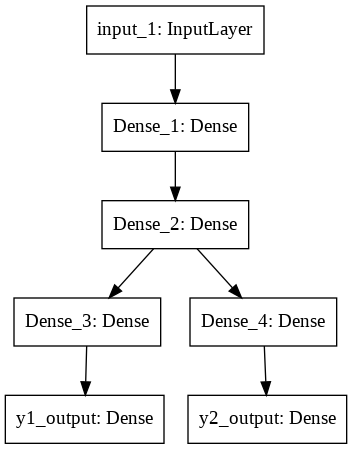

In [31]:
plot_model(model)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_y2_output_root_mean_squared_error', min_delta=0.01, 
                        patience=20, verbose=2, mode='auto',
                        restore_best_weights=True)

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),
                    verbose=2,epochs=50, callbacks = [monitor])

Epoch 1/50
20/20 - 2s - loss: 0.1119 - y1_output_loss: 0.0839 - y2_output_loss: 0.0280 - y1_output_root_mean_squared_error: 0.2897 - y2_output_root_mean_squared_error: 0.1674 - val_loss: 0.0353 - val_y1_output_loss: 0.0194 - val_y2_output_loss: 0.0159 - val_y1_output_root_mean_squared_error: 0.1394 - val_y2_output_root_mean_squared_error: 0.1261
Epoch 2/50
20/20 - 0s - loss: 0.0293 - y1_output_loss: 0.0140 - y2_output_loss: 0.0153 - y1_output_root_mean_squared_error: 0.1182 - y2_output_root_mean_squared_error: 0.1237 - val_loss: 0.0265 - val_y1_output_loss: 0.0146 - val_y2_output_loss: 0.0119 - val_y1_output_root_mean_squared_error: 0.1207 - val_y2_output_root_mean_squared_error: 0.1091
Epoch 3/50
20/20 - 0s - loss: 0.0243 - y1_output_loss: 0.0118 - y2_output_loss: 0.0125 - y1_output_root_mean_squared_error: 0.1086 - y2_output_root_mean_squared_error: 0.1118 - val_loss: 0.0226 - val_y1_output_loss: 0.0122 - val_y2_output_loss: 0.0104 - val_y1_output_root_mean_squared_error: 0.1105 - va

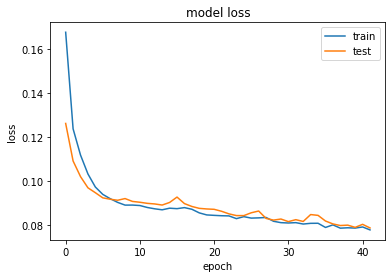

In [20]:
plt.plot(history.history['y2_output_root_mean_squared_error'])
plt.plot(history.history['val_y2_output_root_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
y_pred = model.predict(X_test)


In [ ]:
y_pred = y_pred.reshape(y_pred.shape[0], 2)

In [ ]:
y_pred[-5:]

In [ ]:
y_pred_orig = scaler.inverse_transform(y_pred)
y_pred_orig[-5:]